In [1]:
#Historically, the only other power source at ALAC was gas which has been an off grid via storage tanks.
#Biofuel came online mid-November and replaces the gas component of energy usage.
#The Biofuel is contracted to deliver 90% of the water heating to the pool and air systems which previously ran on gas.

# For how long Bio-Fuel Contract is ?


#Comments

# Can we replace Bio-Fuel with Electrolyser and Fuel Cell (Heat from the fuel cell will be used to heat the pool and and air systems?
# Can we consider Electrolyser & Microturbine as alternative to Electrolyer and Fuel Cell and the Battery Storage?  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import path
import time
import datetime as dt

In [3]:
os.chdir('C:\\Users\\ysingh\\Desktop\\')

In [27]:
df =pd.read_excel('../Desktop/ALAC Energy Data/ALAC_Annual_Load_Data.xlsx')


df.dtypes

Date_and_Time                       datetime64[ns]
Energy Consumption (kWh)                    object
Load Consumption (kW)                       object
Solar Power Output 500 (kW)                float64
Solar Power Output 600 (kW)                float64
Solar Power Output 800 (kW)                float64
Solar Power Output 1000 (kW)               float64
Solar Power Output 500 (kWh)               float64
Solar Power Output 600 (kWh)               float64
Solar Power Output 800 (kWh)               float64
Solar Power Output 1000 (kWh)              float64
Battery Discharge Power 500 (kW)           float64
Battery Discharge Power 800 (kW)           float64
dtype: object

In [28]:
df['Date_and_Time'] = pd.to_datetime(df['Date_and_Time'], errors='ignore')
df.set_index('Date_and_Time', inplace=True)

In [29]:
df['Energy Consumption (kWh)'] = pd.to_numeric(df['Energy Consumption (kWh)'], errors = 'coerce')
df['Load Consumption (kW)']= pd.to_numeric(df['Load Consumption (kW)'], errors = 'coerce')
df.dtypes

Energy Consumption (kWh)            float64
Load Consumption (kW)               float64
Solar Power Output 500 (kW)         float64
Solar Power Output 600 (kW)         float64
Solar Power Output 800 (kW)         float64
Solar Power Output 1000 (kW)        float64
Solar Power Output 500 (kWh)        float64
Solar Power Output 600 (kWh)        float64
Solar Power Output 800 (kWh)        float64
Solar Power Output 1000 (kWh)       float64
Battery Discharge Power 500 (kW)    float64
Battery Discharge Power 800 (kW)    float64
dtype: object

Average hourly load profile of ALAC

count    17481.000000
mean       197.223715
std         47.938092
min          9.980000
25%        164.990000
50%        194.180000
75%        235.650000
max        343.230000
Name: Load Consumption (kW), dtype: float64

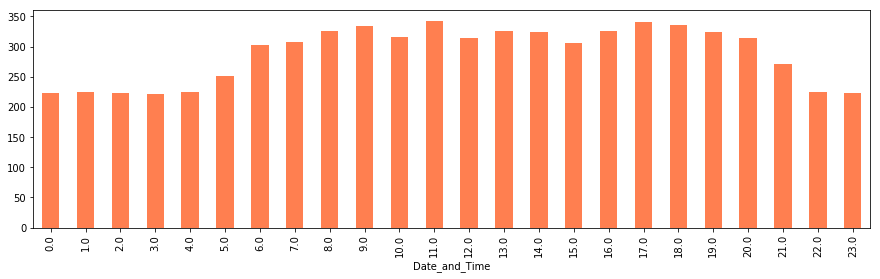

In [30]:
# This code is used the groupy the yearly data into average hourly data.
df['Load Consumption (kW)'].groupby(df['Load Consumption (kW)'].index.hour).max().plot(kind='bar',figsize=(15,4),color='coral')  
df['Load Consumption (kW)'].describe()

500kw PV System 

In [65]:
df['Load_Served_500kW']=(df['Load Consumption (kW)']-df['Solar Power Output 500 (kW)'])
df['Final_Load_Served_500kW']=np.where(df['Load_Served_500kW']<0,0,df['Load_Served_500kW'])
df['x']=df['Final_Load_Served_500kW'].groupby(df['Final_Load_Served_500kW'].index.hour).mean()


SyntaxError: invalid syntax (<ipython-input-65-329c7d8f7d7f>, line 4)

In [37]:
df['Final_Load_Served_500kW'].dtypes

dtype('float64')

In [66]:
# Using the 500kW PV System the avergae load between 7am and 5pm decreases as it can be seen in the following image.
#Unit of the data are kW

df['Load_Served_500kW']=df['Load Consumption (kW)']-df['Solar Power Output 500 (kW)']



df['Final_Load_Served_500kW']=np.where(df['Load_Served_500kW']<0,0,df['Load_Served_500kW'])

df['Final_Load_Served_500kW'].groupby(df['Final_Load_Served_500kW'].index.hour).mean()#.plot(subplots=True,kind='bar',figsize=(15,4),color='coral')  
#df['Final_Load_Served_500kW'].describe()
for key, group in df['Final_Load_Served_500kW']:
    group.plot()


TypeError: 'float' object is not iterable

In [59]:

#500kW PV System Capital cost $300,000
#Saving produced from 500kW System

Grid = 311852.93
FiveHundredkW = 185292.7
Annualsavings = Grid-FiveHundredkW
Annualsavings

126560.22999999998

In [11]:
#Excess energy available from 500kW PV system that could be stored in the battery.

df['Excess_Energy_500kW']=np.where(df['Load_Served_500kW']<0,df['Load_Served_500kW'],0)
#df['Excess_Energy_500kW'].groupby(df['Excess_Energy_500kW'].index.hour).mean().plot(kind='bar',figsize=(15,4),color='coral')
df['Excess_Energy_500kW'].mean()#.resample('Y').sum()
 

-18.230363159817347

500kW PV System + Battery Storage

count    17481.000000
mean       115.347568
std         88.106283
min          0.000000
25%          0.000000
50%        135.170000
75%        180.800000
max        340.860000
Name: Final_Load_Served_500kW + Battery, dtype: float64

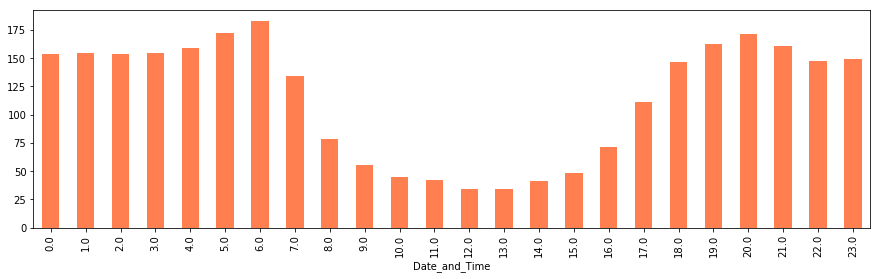

In [12]:
#500kW System + Battery Storage 

df['Load_Served_500kW + Battery']=df['Load Consumption (kW)']-df['Solar Power Output 500 (kW)']-df['Battery Discharge Power 500 (kW)']
df['Final_Load_Served_500kW + Battery']= np.where(df['Load_Served_500kW + Battery']<0,0,df['Load_Served_500kW + Battery'])
df['Final_Load_Served_500kW + Battery'].groupby(df['Final_Load_Served_500kW + Battery'].index.hour).mean().plot(kind='bar',figsize=(15,4),color='coral')  
df['Final_Load_Served_500kW + Battery'].describe()

In [13]:

#500kW PV System + Battery System Capital cost $1,233,657
#Saving produced from 500kW System + Battery System

Grid = 311852.93
FiveHundredkWplusBattery = 158444.4
Annualsavings = Grid-FiveHundredkWplusBattery 
Annualsavings

153408.53

Combined System

,Final_Load_Served_500kW + Battery,Final_Load_Served_500kW,Load Consumption (kW)
count,17481.000000,17481.000000,17481.000000
mean,115.347568,129.750662,197.223715
std,88.106283,82.157707,47.938092
min,0.000000,0.000000,9.980000
25%,0.000000,63.027900,164.990000
50%,135.170000,145.600000,194.180000
75%,180.800000,185.600000,235.650000
max,340.860000,340.860000,343.230000


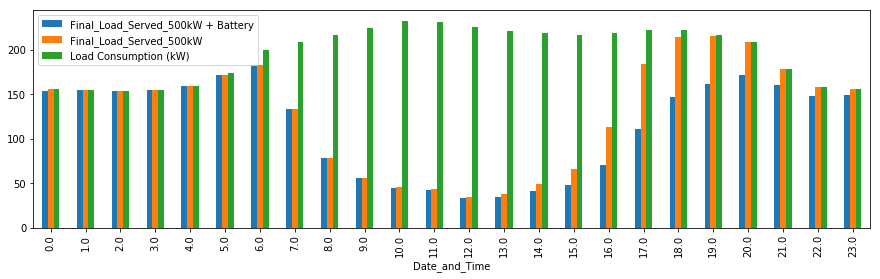

In [14]:
data = pd.DataFrame(
data = df[['Final_Load_Served_500kW + Battery','Final_Load_Served_500kW','Load Consumption (kW)']]
)
data.groupby(data.index.hour).mean().plot(kind='bar',figsize=(15,4))
data.describe()


800kW System 

count    17481.000000
mean       117.861686
std         87.368465
min          0.000000
25%          0.000000
50%        136.000000
75%        181.820000
max        340.860000
Name: Final_Load_Served_800kW, dtype: float64

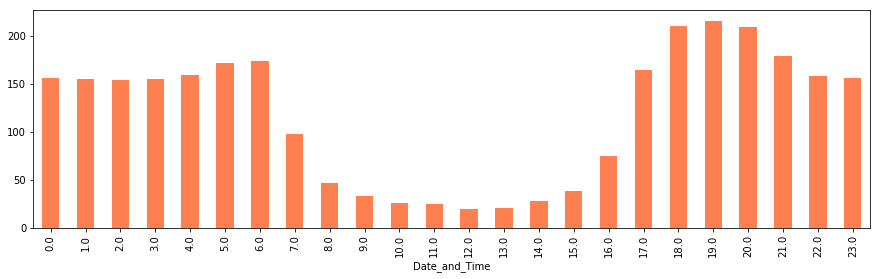

In [15]:
#800kW System anlasyis
df['Load_Served_800kW']=df['Load Consumption (kW)']-df['Solar Power Output 800 (kW)']
df['Final_Load_Served_800kW']=np.where(df['Load_Served_800kW']<0,0,df['Load_Served_800kW'])
df['Final_Load_Served_800kW'].groupby(df['Final_Load_Served_800kW'].index.hour).mean().plot(kind='bar',figsize=(15,4),color='coral')  
df['Final_Load_Served_800kW'].describe()

800kW PV System + Battery Storage System

count    17481.000000
mean        84.924022
std         89.814317
min          0.000000
25%          0.000000
50%         51.852600
75%        169.410000
max        340.860000
Name: Final_Load_Served_800kW + Battery, dtype: float64

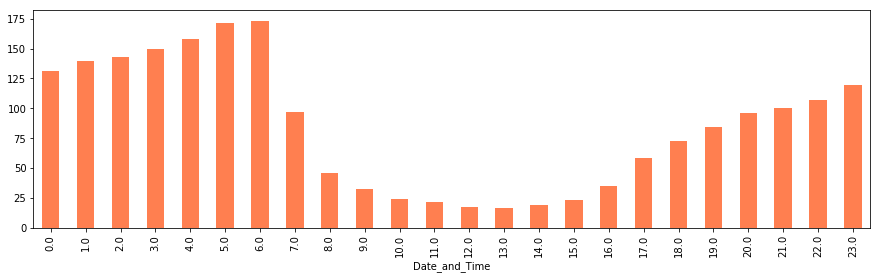

In [16]:
df['Load_Served_800kW + Battery']=df['Load Consumption (kW)']-df['Solar Power Output 800 (kW)']-df['Battery Discharge Power 800 (kW)']
df['Final_Load_Served_800kW + Battery']= np.where(df['Load_Served_800kW + Battery']<0,0,df['Load_Served_800kW + Battery'])
df['Final_Load_Served_800kW + Battery'].groupby(df['Final_Load_Served_800kW + Battery'].index.hour).mean().plot(kind='bar',figsize=(15,4),color='coral')  
df['Final_Load_Served_800kW + Battery'].describe()

Combined System

,Final_Load_Served_800kW + Battery,Final_Load_Served_800kW,Load Consumption (kW)
count,17481.000000,17481.000000,17481.000000
mean,84.924022,117.861686,197.223715
std,89.814317,87.368465,47.938092
min,0.000000,0.000000,9.980000
25%,0.000000,0.000000,164.990000
50%,51.852600,136.000000,194.180000
75%,169.410000,181.820000,235.650000
max,340.860000,340.860000,343.230000


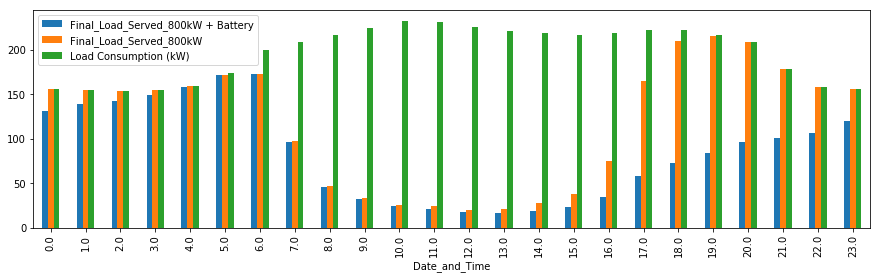

In [17]:
data = pd.DataFrame(
data = df[['Final_Load_Served_800kW + Battery','Final_Load_Served_800kW','Load Consumption (kW)']]
)
data.groupby(data.index.hour).mean().plot(kind='bar',figsize=(15,4))
data.describe()


In [18]:
data = pd.DataFrame(
data1=df[['Energy Consumption (kWh)','Solar Power Output 500 (kWh)']]#,'Solar Power Output 600 (kWh)']]#,
       #'Battery Discharge Power (kWh)']],
)

data.resample('D').sum().plot(figsize=(15,4),kind='bar')#,subplots=True)

plt.xlabel('Months')
plt.ylabel('Energy (kWh)')

data.resample('D').sum().mean()

TypeError: __init__() got an unexpected keyword argument 'data1'

In [ ]:
#data.resample('D').sum().plot(figsize=(15,4),subplots=True)

In [ ]:
# It is not a constant load and due to fluctuations in the energy produced by PV we would definately require battery storage.
# Peak energy consumption of ALAC is from 5 am and 10pm (3.71MWh) whereas daily energy consumption 

In [ ]:
#Daytime Energy Consumption Vs Daily Solar Power Prodcuction
# 

data.between_time('08:00','16:00').resample('D').sum().plot(figsize=(15,4),title='Daily Solar Production Vs Daily Energy Consumption (kWh)',
                                                           kind='bar')

plt.xlabel('Months')
plt.ylabel('Energy (kWh)')

data.between_time('08:00','16:00').resample('D').sum().mean()

Daytime energy consumption ALAC

In [ ]:
#data['Daytime_Energy_Consumption (kWh)'] = data['Energy Consumption (kWh)'].between_time('08:00','17:00')
#data['Daytime_Energy_Consumption (kWh)'].resample('D').sum().plot(kind='bar',figsize=(15,4),color='C')
#data['Daytime_Energy_Consumption (kWh)'].resample('D').sum().mean()

In [ ]:
 #data['Daytime_Energy_Consumption (kWh)'].groupby(data['Daytime_Energy_Consumption (kWh)'].index.hour).mean().plot(kind ='bar',
                                                                                             #color='C',title='Average Hourly Energy Consumption (MWh)')


Daily PV Production 500kW

In [ ]:
#data['Daily_PV_Production 500 (KWh)']= data['Solar Power Output 500 (kWh)'].between_time('08:00','17:00')
#data['Daily_PV_Production 500 (KWh)'].resample('D').sum().plot(kind='bar',color='coral',figsize=(15,4))

# Average daytime energy consumption between 8am to 5pm
#data['Daily_PV_Production 500 (KWh)'].resample('D').sum().mean()

In [ ]:
#data['Daily_PV_Production 500 (KWh)'].groupby(data['Daily_PV_Production 500 (KWh)'].index.hour).mean().plot(kind ='bar',
                                                                                        #color = 'C', title='Average Hourly Energy Consumption (MWh)')


Battery Storage Energy

In [ ]:
#data['Battery Discharge Power (kWh)'].resample('D').sum().plot(color='B',figsize=(15,4))
#data['Battery Discharge Power (kWh)'].resample('D').sum().mean()


In [ ]:
#data['Battery Discharge Power (kWh)'].groupby(data['Battery Discharge Power (kWh)'].index.hour).mean().plot(kind ='bar',
                                                       #color = 'C', title='Battery Discharge Power (kWh)')
#plt.xlabel('Hours')
#plt.ylabel('Energy (kWh)')

In [ ]:
#data['Daily_PV_Production 600 (KWh)']= data['Solar Power Output 600 (kWh)'].between_time('08:00','17:00')
#data['Daily_PV_Production 600 (KWh)'].resample('D').sum().plot(color='coral',figsize=(15,4))
# Average daytime energy consumption between 8am to 5pm
#data['Daily_PV_Production 600 (KWh)'].resample('D').sum().mean()

In [ ]:
#Plot for Daytime energy consumption Vs Daily PV production
#data.plot(y=["Daytime_Energy_Consumption (kWh)","Daily_PV_Production (KWh)"],figsize=(15,4))

In [ ]:
data['Load_Served']= data['Energy Consumption (kWh)']-data['Solar Power Output 500 (kWh)']
data['Final_Load_Served']=np.where(data['Load_Served']<0,0,data['Load_Served'])
data['Final_Load_Served'].plot(figsize=(15,4),color='coral')                           
#data['Load_Served'].resample('D').sum().plot(figsize=(15,4),color='coral')
#data['Load_Served'].groupby(lambda x: x.hour).mean().plot(kind ='bar',color='c')

In [ ]:
plt.plot(y='Final_Load_Served','Energy Consumption (kWh')

Excess energy available throughout the year

In [ ]:
# Excess energy available per year would be 159MWh which could be met by 1.5MWh battery storage but it will be only 
#feasible during Summer but in Winter would not be much effective so during the winter Microtrubines can be used that could also be used 
# to heat the pool.


df['Difference_1']=np.where(data['Difference']<0,data['Difference']*(-1),0)
df['Difference_1'].resample('D').sum().plot(figsize=(15,4),title='Excess Energy per day (kWh)',kind='bar',color='C')

plt.xlabel('Months')
plt.ylabel('Energy (kwh)')
df['Difference_1'].resample('Y').sum()#.max()

In [ ]:

#df['Difference'] = np.where(data['Solar Power Output (kWh)']>0,data['Daytime_Energy_Consumption (kWh)']-data['Solar Power Output (kWh)'],
                          # 0)
#df['Difference'].resample('D').sum()#.plot(figsize=(15,4),title='Energy Difference per day (kWh)')

#plt.xlabel('Months')
#plt.ylabel('Energy (kwh)')